In [5]:
import matplotlib.pyplot as plt
import copy
import random as r
import numpy as np
from scipy.integrate import odeint
import math
import time


arquivo = open("./../Data/GRN5_DATA.txt", 'r')

x = []
A = []
B = []
C = []
D = []
E = []

for linha in arquivo:
    elementos = linha.split()
    x.append(float(elementos[0].strip()))
    A.append(float(elementos[1].strip()))
    B.append(float(elementos[2].strip()))
    C.append(float(elementos[3].strip()))
    D.append(float(elementos[4].strip()))
    E.append(float(elementos[5].strip()))


maximo_A = max(A)
maximo_B = max(B)
maximo_C = max(C)
maximo_D = max(D)
maximo_E = max(E)


maximos = []
maximos.append(maximo_A)
maximos.append(maximo_B)
maximos.append(maximo_C)
maximos.append(maximo_D)
maximos.append(maximo_E)


A_ORIGINAL = copy.deepcopy(A)
B_ORIGINAL = copy.deepcopy(B)
C_ORIGINAL = copy.deepcopy(C)
D_ORIGINAL = copy.deepcopy(D)
E_ORIGINAL = copy.deepcopy(E)

maior_todos = max(maximos)

Y0 = []
Y0.append(A[0])
Y0.append(B[0])
Y0.append(C[0])
Y0.append(D[0])
Y0.append(E[0])

IND_SIZE = 19#Tamanho do indivíduo (quantidade de coeficientes)
MIN_K = 0.1#Menor valor que K pode assumir
MAX_K = 1#Maior valor que K pode assumir
MIN_N = 1#Menor valor que N pode assumir
MAX_N = 25#Maior valor que N pode assumir
MIN_TAU = 0.1#Menor valor que TAU pode assumir
MAX_TAU = 5#Maior valor que TAU pode assumir
MIN_STRATEGY = 0.1 #Menor valor que a estratégia pode assumir
MAX_STRATEGY = 10#Maior valor que a estratégia pode assumir
TAU_SIZE = 5
N_SIZE = 7
K_SIZE = 7
#INDIVIDUO: [tauA, tauB, tauC, tauD, tauE, kA, kB, kC, kD, kE, nA, nB, nC, nD, nE]

#dobra_pontos = [0.0, 0.7347, 1.4694, 2.2041, 2.9388, 3.6735, 4.4082, 5.1429, 5.8776, 6.6123, 7.3469, 8.0816, 8.8163, 9.551, 10.2857, 11.0204, 11.7551, 12.4898, 13.2245, 13.9592, 14.6939, 15.4286, 16.1633, 16.898, 17.6327, 18.3674, 19.102, 19.8367, 20.5714, 21.3061, 22.0408, 22.7755, 23.5102, 24.2449, 24.9796, 25.7143, 26.449, 27.1837, 27.9184, 28.6531, 29.3878, 30.1225, 30.8571, 31.5918, 32.3265, 33.0612, 33.7959, 34.5306, 35.2653, 36.0, 36.7347, 37.4694, 38.2041, 38.9388, 39.6735, 40.4082, 41.1429, 41.8776, 42.6122, 43.3469, 44.0816, 44.8163, 45.551, 46.2857, 47.0204, 47.7551, 48.4898, 49.2245, 49.9592, 50.6939, 51.4286, 52.1633, 52.898, 53.6327, 54.3673, 55.102, 55.8367, 56.5714, 57.3061, 58.0408, 58.7755, 59.5102, 60.2449, 60.9796, 61.7143, 62.449, 63.1837, 63.9184, 64.6531, 65.3878, 66.1224, 66.8571, 67.5918, 68.3265, 69.0612, 69.7959, 70.5306, 71.2653, 72.0, 72.7347]

dobra_pontos = copy.deepcopy(x)

POPULACAO = []
APTIDAO = []


LAMBDA_FILHOS = []
APTIDAO_FILHOS = []


def twoBody(y, t, tauA, kA, nA, tauB, kB, nB, tauC, kC, nC, tauD, kD, nD, tauE, kEB, kED, kEE, nEB, nED, nEE):
    ydot = np.empty((5,))
    
    ydot[0] = ((1 - (pow((y[4]/maximo_E),nA)/(pow((y[4]/maximo_E),nA)+pow(kA, nA))))-(y[0]/maximo_A)) / tauA

    ydot[1] = (((pow((y[0]/maximo_A), nB))/(pow((y[0]/maximo_A),nB) + pow(kB, nB))) - (y[1]/maximo_B)) / tauB

    ydot[2] = (((pow((y[1]/maximo_B), nC))/(pow((y[1]/maximo_B),nC) + pow(kC, nC))) - (y[2]/maximo_C)) / tauC

    ydot[3] = (((pow((y[2]/maximo_C), nD))/(pow((y[2]/maximo_C),nD) + pow(kD, nD))) - (y[3]/maximo_D)) / tauD

    ydot[4] = ((((pow(y[1]/maximo_B, nEB)/(pow(y[1]/maximo_B, nEB) + pow(kEB, nEB)))*(pow(y[3]/maximo_D, nED)/(pow(y[3]/maximo_D, nED) + pow(kED, nED))))+((pow(y[3]/maximo_D, nED)/(pow(y[3]/maximo_D, nED) + pow(kED, nED)))*(pow(y[4]/maximo_E, nEE)/(pow(y[4]/maximo_E, nEE) + pow(kEE, nEE))))) - (y[4]/maximo_E)) / tauE

    return ydot




def organiza_pontos(solucao):
    pA = []
    pB = []
    pC = []
    pD = []
    pE = []
    for pontos in range(len(solucao)):
        if pontos % 2 == 0 or pontos % 2 == 1:
            pA.append(solucao[pontos][0])
            pB.append(solucao[pontos][1])
            pC.append(solucao[pontos][2])
            pD.append(solucao[pontos][3])
            pE.append(solucao[pontos][4])
    return pA, pB, pC, pD, pE



        
def calcula_diferenca(pA, pB, pC, pD, pE):
    difA = 0
    difB = 0
    difC = 0
    difD = 0
    difE = 0
    pAl = []
    pBl = []
    pCl = []
    pDl = []
    pEl = []

    for elemento in range(len(pA)):
        dif = abs(A_ORIGINAL[elemento] - pA[elemento])
        difA += dif
    for elemento in range(len(pB)):
        dif = abs(B_ORIGINAL[elemento] - pB[elemento])
        difB += dif
    for elemento in range(len(pC)):
        dif = abs(C_ORIGINAL[elemento] - pC[elemento])
        difC += dif
    for elemento in range(len(pD)):
        dif = abs(D_ORIGINAL[elemento] - pD[elemento])
        difD += dif
    for elemento in range(len(pE)):
        dif = abs(E_ORIGINAL[elemento] - pE[elemento])
        difE += dif
    
    difTotal = difA + difB + difC + difD + difE
    return difTotal

def calcula_diferenca_norma2(pA, pB, pC, pD, pE):
    difA = 0
    difB = 0
    difC = 0
    difD = 0
    difE = 0
    pAl = []
    pBl = []
    pCl = []
    pDl = []
    pEl = []
        
    for elemento in range(len(pA)):
        dif = A_ORIGINAL[elemento] - pA[elemento]
        #dif = A[elemento] - pAl[elemento]
        dif = pow(dif, 2)
        difA += dif
    for elemento in range(len(pB)):
        dif = B_ORIGINAL[elemento] - pB[elemento]
        #dif = B[elemento] - pBl[elemento]
        dif = pow(dif, 2)
        difB += dif
    for elemento in range(len(pC)):
        dif = C_ORIGINAL[elemento] - pC[elemento]
        #dif = C[elemento] - pCl[elemento]
        dif = pow(dif, 2)
        difC += dif
    for elemento in range(len(pD)):
        dif = D_ORIGINAL[elemento] - pD[elemento]
        #dif = D[elemento] - pDl[elemento]
        dif = pow(dif, 2)
        difD += dif
    for elemento in range(len(pE)):
        dif = E_ORIGINAL[elemento] - pE[elemento]
        #dif = E[elemento] - pEl[elemento]
        dif = pow(dif, 2)
        difE += dif
    
    difTotal = difA + difB + difC + difD + difE
    difTotal = math.sqrt(difTotal)
    return difTotal

def cria_individuo(ind_size, tau_size, n_size, k_size, min_tau, max_tau, min_n, max_n, min_k, max_k, min_strategy, max_strategy):
    ind = []
    for i in range(tau_size):
        ind.append(r.uniform(min_tau, max_tau))
    for i in range(k_size):
        ind.append(r.uniform(min_k, max_k))
    for i in range(n_size):
        ind.append(r.uniform(min_n, max_n))
    for i in range(ind_size):
        ind.append(r.uniform(min_strategy, max_strategy))
    return ind


def mutESLogNormal(ind, c, indpb):
    size = IND_SIZE
    t = c / math.sqrt(2. * math.sqrt(size))
    t0 = c / math.sqrt(2. * size)
    n = r.gauss(0, 1)
    t0_n = t0 * n
    for indx in range(size):
        if r.random() < indpb:
            if indx == 0 or indx == 1 or indx == 2 or indx == 3 or indx == 4: #EH TAU
                copia_local_s = copy.deepcopy(ind[indx + IND_SIZE])
                copia_local_i = copy.deepcopy(ind[indx])
                ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))
                ind[indx] *= ind[indx + IND_SIZE] * r.gauss(0, 1)
                if ind[indx + IND_SIZE] > MAX_STRATEGY:
                    ind[indx + IND_SIZE] = copy.deepcopy(MAX_STRATEGY)
                while ind[indx] < MIN_TAU or ind[indx] > MAX_TAU:
                    ind[indx + IND_SIZE] = copy.deepcopy(copia_local_s)
                    ind[indx] = copy.deepcopy(copia_local_i)
                    ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))
                    ind[indx] *= ind[indx + IND_SIZE] * r.gauss(0, 1)
            #tauA, tauB, tauC, tauD, tauE, kA, kB, kCA, kCB, kCE, kD, kE, nA, nB, nCA, nCB, nCE, nD, nE        
            if indx >= 5 and indx <= 11: #EH K
                copia_local_s = copy.deepcopy(ind[indx + IND_SIZE])
                copia_local_i = copy.deepcopy(ind[indx])
                ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))
                ind[indx] *= ind[indx + IND_SIZE] * r.gauss(0, 1)
                if ind[indx + IND_SIZE] > MAX_STRATEGY:
                    ind[indx + IND_SIZE] = copy.deepcopy(MAX_STRATEGY)                             
                while ind[indx] < MIN_K or ind[indx] > MAX_K:
                    #print("entrou restrição K")
                    #print(ind[indx])
                    ind[indx + IND_SIZE] = copy.deepcopy(copia_local_s)
                    ind[indx] = copy.deepcopy(copia_local_i)
                    ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))
                    ind[indx] *= ind[indx + IND_SIZE] * r.gauss(0, 1)
                    #print("modificação K")
                    #print(ind[indx])
                
            if indx >= 12: #EH N
                copia_local_s = copy.deepcopy(ind[indx + IND_SIZE])
                copia_local_i = copy.deepcopy(ind[indx])                
                ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))
                ind[indx] *= ind[indx + IND_SIZE] * r.gauss(0, 1)
                if ind[indx + IND_SIZE] > MAX_STRATEGY:
                    ind[indx + IND_SIZE] = copy.deepcopy(MAX_STRATEGY)                               
                while ind[indx] < MIN_N or ind[indx] > MAX_N:
                    ind[indx + IND_SIZE] = copy.deepcopy(copia_local_s)
                    ind[indx] = copy.deepcopy(copia_local_i)
                    ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))
                    ind[indx] *= ind[indx + IND_SIZE] * r.gauss(0, 1)                        
    return ind

def varOr(populacao, lambda_f):
    offspring = []
    for descendencia in range(lambda_f):
        ind = copy.deepcopy(r.choice(populacao))
        ind_mutado = mutESLogNormal(ind, 1, 0.03)
        offspring.append(ind_mutado)
    return offspring
    
def selRandom(individuals, k):
    selecionados = []
    for i in range(k):
        selecionados.append(r.choice(individuals))
    return selecionados

def selTournament(individuals, k, tournsize):
    chosen = []
    chosen_apt = []
    for i in range(k):
        aspirants = selRandom(individuals, tournsize)
        aptidoes = []
        for individuos in range(len(aspirants)):
            individuo_atual = aspirants[individuos]
            for descendencias in range(len(individuals)):
                if individuo_atual == individuals[descendencias]:
                    aptidoes.append(APTIDAO_FILHOS[descendencias])
                    break
        menor_erro = min(aptidoes)
        chosen_apt.append(menor_erro)
        for j in range(len(aptidoes)):
            if aptidoes[j] == menor_erro:
                indice_menor_erro = j
        chosen.append(aspirants[indice_menor_erro])
    return chosen, chosen_apt     
        
def atualiza_pais(novos_pais):
    POPULACAO = copy.deepcopy(novos_pais)

def atualiza_aptidoes(novas_aptidoes):
    APTIDOES = copy.deepcopy(novas_aptidoes)

    
def main():
    r.seed(2)
    MU, LAMBDA = 15, 105
    for qtd_progenitores in range(MU):
        POPULACAO.append(cria_individuo(IND_SIZE, TAU_SIZE, N_SIZE, K_SIZE, MIN_TAU, MAX_TAU, MIN_N, MAX_N, MIN_K, MAX_K, MIN_STRATEGY, MAX_STRATEGY))       
    for qtd_progenitores in range(MU):
        ind_atual = POPULACAO[qtd_progenitores]
        tauA = ind_atual[0]
        tauB = ind_atual[1]
        tauC = ind_atual[2]
        tauD = ind_atual[3]
        tauE = ind_atual[4]
        kA = ind_atual[5]
        kB = ind_atual[6]
        kC = ind_atual[7]
        kD = ind_atual[8]
        kEB = ind_atual[9]
        kED = ind_atual[10]
        kEE = ind_atual[11]
        nA = ind_atual[12]
        nB = ind_atual[13]
        nC = ind_atual[14]
        nD = ind_atual[15]
        nEB = ind_atual[16]
        nED = ind_atual[17]
        nEE = ind_atual[18] 
        
        solution = odeint(twoBody, Y0, dobra_pontos, args=(tauA, kA, int(nA), tauB, kB, int(nB), tauC, kC, int(nC), tauD, kD, int(nD), tauE, kEB, kED, kEE, int(nEB), int(nED), int(nEE),))
        pA, pB, pC, pD, pE = organiza_pontos(solution)
        APTIDAO.append(calcula_diferenca(pA, pB, pC, pD, pE))

    for gen in range(10001): #Início do processo geracional
        #Varia Populacao (varOr)
        offspring = varOr(POPULACAO, LAMBDA)
        #Avalia Descendência
        APTIDAO_FILHOS.clear()
        for qtd_descendencia in range(LAMBDA):
            ind_atual = offspring[qtd_descendencia]
            tauA = ind_atual[0]
            tauB = ind_atual[1]
            tauC = ind_atual[2]
            tauD = ind_atual[3]
            tauE = ind_atual[4]
            kA = ind_atual[5]
            kB = ind_atual[6]
            kC = ind_atual[7]
            kD = ind_atual[8]
            kEB = ind_atual[9]
            kED = ind_atual[10]
            kEE = ind_atual[11]
            nA = ind_atual[12]
            nB = ind_atual[13]
            nC = ind_atual[14]
            nD = ind_atual[15]
            nEB = ind_atual[16]
            nED = ind_atual[17]
            nEE = ind_atual[18] 
            
            solution = odeint(twoBody, Y0, dobra_pontos, args=(tauA, kA, int(nA), tauB, kB, int(nB), tauC, kC, int(nC), tauD, kD, int(nD), tauE, kEB, kED, kEE, int(nEB), int(nED), int(nEE),))
            pA, pB, pC, pD, pE = organiza_pontos(solution)
            #print(pA)
            diferenca = calcula_diferenca(pA, pB, pC, pD, pE)
            if math.isnan(diferenca):
                pass
            else:
                APTIDAO_FILHOS.append(diferenca)
        #Seleciona população para a geração seguinte
        novos_pais, novas_aptidoes = selTournament(offspring, MU, 3)

        POPULACAO.clear()
        for elemento in novos_pais:
            POPULACAO.append(elemento)


        APTIDAO.clear()
        for elemento in novas_aptidoes:
            APTIDAO.append(elemento)
        #print(gen)
        if gen % 100 == 0:
            print("Geração: ", gen)
            print("Aptidoes: ", APTIDAO)
            arquivo_guarda = open("resultados.txt", "a")
            menor_valor = min(APTIDAO)
            for item in range(len(APTIDAO)):
                if menor_valor == APTIDAO[item]:
                    indice_menor = item
            arquivo_guarda.write("GEN: " + str(gen))
            arquivo_guarda.write("\n")
            arquivo_guarda.write("Individuo: \n")
            arquivo_guarda.write(str(POPULACAO[indice_menor]))
            arquivo_guarda.write("\n")
            arquivo_guarda.write("APTIDAO: \n")
            arquivo_guarda.write(str(menor_valor))
            arquivo_guarda.close()
            
    menor_valor = min(APTIDAO)
    for item in range(len(APTIDAO)):
        if menor_valor == APTIDAO[item]:
            indice_menor = item

    ind_atual = POPULACAO[indice_menor]
    tauA = ind_atual[0]
    tauB = ind_atual[1]
    tauC = ind_atual[2]
    tauD = ind_atual[3]
    tauE = ind_atual[4]
    kA = ind_atual[5]
    kB = ind_atual[6]
    kC = ind_atual[7]
    kD = ind_atual[8]
    kEB = ind_atual[9]
    kED = ind_atual[10]
    kEE = ind_atual[11]
    nA = ind_atual[12]
    nB = ind_atual[13]
    nC = ind_atual[14]
    nD = ind_atual[15]
    nEB = ind_atual[16]
    nED = ind_atual[17]
    nEE = ind_atual[18] 
    
    solution = odeint(twoBody, Y0, dobra_pontos, args=(tauA, kA, int(nA), tauB, kB, int(nB), tauC, kC, int(nC), tauD, kD, int(nD), tauE, kEB, kED, kEE, int(nEB), int(nED), int(nEE),))
    pA, pB, pC, pD, pE = organiza_pontos(solution)

    plt.plot(x, pA)
    plt.plot(x, A_ORIGINAL)
    plt.legend(['Ac', 'A'])
    plt.savefig("A.eps", dpi=300)
    plt.show()
    plt.plot(x, pB)
    plt.plot(x, B_ORIGINAL)
    plt.legend(['Bc', 'B'])
    plt.savefig("B.eps", dpi=300)
    plt.show()
    plt.plot(x, pC)
    plt.plot(x, C_ORIGINAL)
    plt.legend(['Cc', 'C'])
    plt.savefig("C.eps", dpi=300)
    plt.show()
    plt.plot(x, pD)
    plt.plot(x, D_ORIGINAL)
    plt.legend(['Dc', 'D'])
    plt.savefig("D.eps", dpi=300)
    plt.show()
    plt.plot(x, pE)
    plt.plot(x, E_ORIGINAL)
    plt.legend(['Ec', 'E'])
    plt.savefig("E.eps", dpi=300)
    plt.show()
    





def diferenca_teste():
    ind_atual = [1.2163355099083872, 1.1264485098219865, 2.973714367061704, 2.952143123315177, 2.998260518457365, 0.5687249950503857, 0.4580723119903261, 0.46214892372246563, 0.6182568295500336, 0.5213082492659304, 0.7708877748759901, 0.1497642024548283, 4.254757908429968, 3.759370669969996, 4.784173526119725, 10.935884810737809, 24.595975874929724, 2.8109199678182635, 4.922623602327875, 1.804297289687443, 0.6961641316460799, 1.1805067448542073, 3.769380877770944, 0.6268588518301711, 0.7945926074279098, 0.8665901143646684, 1.1631405647512596, 2.3141178250393146, 1.2841062086785697, 0.7091739090057955, 2.245324305294896, 0.8208096283146853, 0.6911548119817139, 0.7874359961268611, 1.101498884676361, 0.7742237807425528, 0.9816157239798934, 70.97756457350062]

    tauA = ind_atual[0]
    tauB = ind_atual[1]
    tauC = ind_atual[2]
    tauD = ind_atual[3]
    tauE = ind_atual[4]
    kA = ind_atual[5]
    kB = ind_atual[6]
    kC = ind_atual[7]
    kD = ind_atual[8]
    kEB = ind_atual[9]
    kED = ind_atual[10]
    kEE = ind_atual[11]
    nA = ind_atual[12]
    nB = ind_atual[13]
    nC = ind_atual[14]
    nD = ind_atual[15]
    nEB = ind_atual[16]
    nED = ind_atual[17]
    nEE = ind_atual[18] 


    solution = odeint(twoBody, Y0, dobra_pontos, args=(tauA, kA, int(nA), tauB, kB, int(nB), tauC, kC, int(nC), tauD, kD, int(nD), tauE, kEB, kED, kEE, int(nEB), int(nED), int(nEE),))
    pA, pB, pC, pD, pE = organiza_pontos(solution)

    plt.plot(x, pA)
    plt.plot(x, A_ORIGINAL)
    plt.legend(['Ac', 'A'])
    #plt.savefig("A.eps", dpi=300)
    plt.show()
    plt.plot(x, pB)
    plt.plot(x, B_ORIGINAL)
    plt.legend(['Bc', 'B'])
    #plt.savefig("B.eps", dpi=300)
    plt.show()
    plt.plot(x, pC)
    plt.plot(x, C_ORIGINAL)
    plt.legend(['Cc', 'C'])
    #plt.savefig("C.eps", dpi=300)
    plt.show()
    plt.plot(x, pD)
    plt.plot(x, D_ORIGINAL)
    plt.legend(['Dc', 'D'])
    #plt.savefig("D.eps", dpi=300)
    plt.show()
    plt.plot(x, pE)
    plt.plot(x, E_ORIGINAL)
    plt.legend(['Ec', 'E'])
    #plt.savefig("E.eps", dpi=300)
    plt.show()

    return calcula_diferenca(pA, pB, pC, pD, pE)


In [6]:
main()

Geração:  0
Aptidoes:  [178.9500685851662, 134.66539979519723, 157.1172173366068, 134.3398365909487, 168.4577337169444, 141.82537137593604, 134.21927487287934, 163.29419697091444, 115.4585475643523, 153.0720737039863, 134.21927487287934, 130.32516136213857, 129.69708482394597, 132.91397419341672, 141.82537137593604]
Geração:  100
Aptidoes:  [43.008900803250185, 43.008900803250185, 43.008900803250185, 42.78222799111644, 43.008900803250185, 43.008900803250185, 43.008900803250185, 109.30131208071685, 43.008900803250185, 43.008900803250185, 43.008900803250185, 55.79996016081378, 43.008900803250185, 42.20252701347617, 43.008900803250185]
Geração:  200
Aptidoes:  [39.48171092985707, 44.05189546684964, 40.56859553918025, 44.05189546684964, 39.636454332951104, 43.52023533975648, 43.52023533975648, 39.636454332951104, 39.48171092985707, 40.28080634355842, 40.56859553918025, 40.62640747104741, 43.52023533975648, 44.05189546684964, 44.05189546684964]
Geração:  300
Aptidoes:  [38.69825377000008, 3

KeyboardInterrupt: 

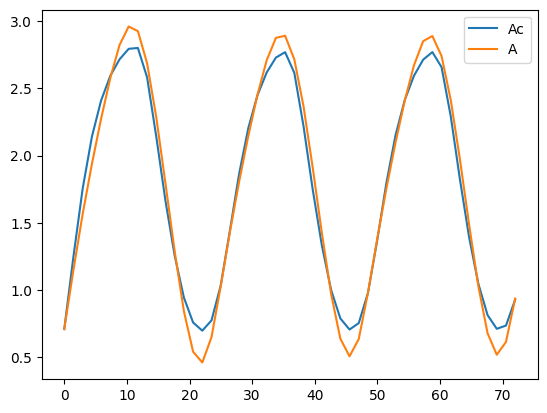

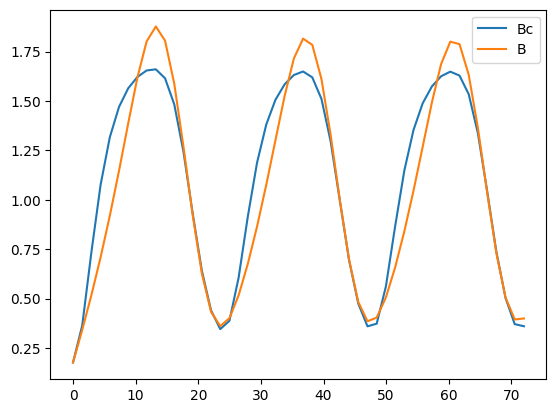

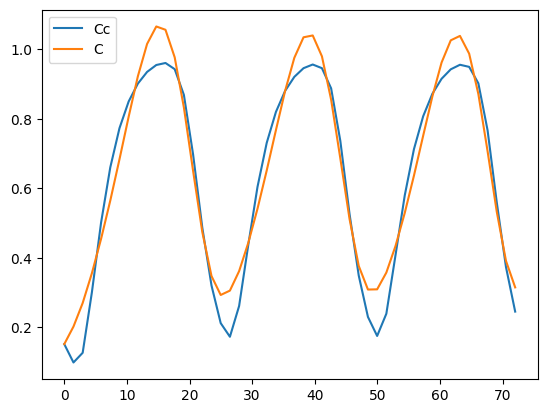

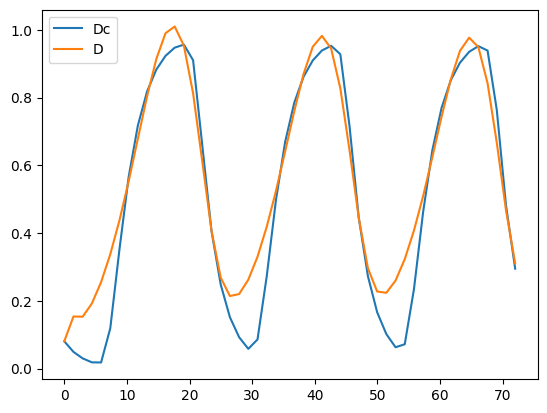

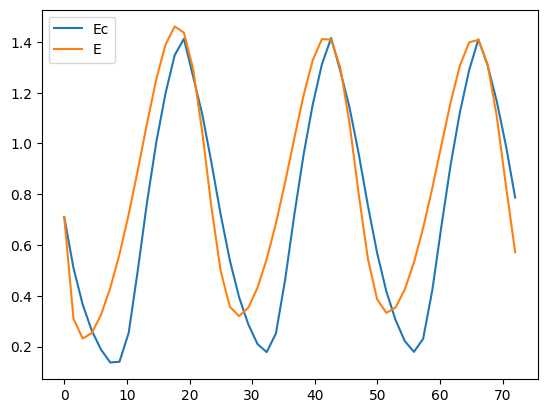

26.9210317096613

In [3]:
#diferenca_teste()

In [4]:
def plotSolution():
    ind_atual = [1.2163355099083872, 1.1264485098219865, 2.973714367061704, 2.952143123315177, 2.998260518457365, 0.5687249950503857, 0.4580723119903261, 0.46214892372246563, 0.6182568295500336, 0.5213082492659304, 0.7708877748759901, 0.1497642024548283, 4.254757908429968, 3.759370669969996, 4.784173526119725, 10.935884810737809, 24.595975874929724, 2.8109199678182635, 4.922623602327875, 1.804297289687443, 0.6961641316460799, 1.1805067448542073, 3.769380877770944, 0.6268588518301711, 0.7945926074279098, 0.8665901143646684, 1.1631405647512596, 2.3141178250393146, 1.2841062086785697, 0.7091739090057955, 2.245324305294896, 0.8208096283146853, 0.6911548119817139, 0.7874359961268611, 1.101498884676361, 0.7742237807425528, 0.9816157239798934, 70.97756457350062]
    
    tauA = ind_atual[0]
    tauB = ind_atual[1]
    tauC = ind_atual[2]
    tauD = ind_atual[3]
    tauE = ind_atual[4]
    kA = ind_atual[5]
    kB = ind_atual[6]
    kC = ind_atual[7]
    kD = ind_atual[8]
    kEB = ind_atual[9]
    kED = ind_atual[10]
    kEE = ind_atual[11]
    nA = ind_atual[12]
    nB = ind_atual[13]
    nC = ind_atual[14]
    nD = ind_atual[15]
    nEB = ind_atual[16]
    nED = ind_atual[17]
    nEE = ind_atual[18] 
    
    
